# Tarea 1
### Modelos no paramétricos y de regresión

##### Por: Alberto Olvera Trejo

In [22]:
import numpy as np
from scipy.stats import binom
import scipy.stats
import matplotlib.pyplot as plt

# !pip install import-ipynb
import import_ipynb

from TestEquality import *

### Ejercicio 1

El porcentaje del contenido de agua en tierras de cultivo varía ligeramente en áreas grandes y estas variaciones pueden asociarse a aspectos relacionados con la calidad del drenaje. Se toman dos muestras de $10$ cuadrantes cada una del porcentaje de agua en el terreno, y una  muestra en otros 10. Se desea sostener la hipótesis de una mediana de $9$ con un nivel de error del $5\%$.
- Realiza la prueba con una sola muestra y luego con ambas. Discute tus resultados.
- Construye un intervalo del $95\%$ de confianza para la mediana considerando ambas muestras.

| Muestra 1  | Muestra 2 |
|------------|-----------|
|     5.5    |    5.6    |
|     6.0    |    6.1    |
|     6.5    |    6.3    |
|     7.6    |    6.3    |
|     7.6    |    6.5    |
|     7.7    |    6.6    |
|     8.0    |    7.0    |
|     8.2    |    7.5    |
|     9.1    |    7.9    |
|     15.1   |    8.0    |
|            |    8.0    |
|            |    8.1    |
|            |    8.1    |
|            |    8.3    |
|            |    8.4    |
|            |    8.5    |
|            |    8.7    |
|            |    9.4    |
|            |    14.3   |
|            |    26.0   |


##### a) Prueba con una sola muestra

In [23]:
alfa = 0.05
mediana_0 = 9

#guardamos los datos en un vector y eliminamos los repetidos
X_1 = np.array([5.5, 6.0, 6.5, 7.6, 7.6, 7.7, 8.0, 8.2, 9.1, 15.1])
X_1 = np.unique(X_1)

#Calculamos la K observada, es decir, los signos positivos
K_obs = len(X_1[X_1 > mediana_0])

#Calculamos la region de rechazo
proba = 0
k_1 = 1
k_2 = len(X_1) + 1
n = len(X_1)
p = 1/2

while proba <= alfa and (k_1 <= k_2):
  k_1 += 1
  k_2 -= 1

  #calculamos las probas de ambas colas
  p1 = binom.cdf(k_1, n, p)
  p2 = 1 - binom.cdf(k_2, n, p, loc = 0)

  proba = p1 + p2
  print(proba)

k_1 -= 1
k_2 += 1

print(f'Rechazar H_0 si K_obs <= {k_1} o si K_obs >= {k_2}')
print(f'K_obs = {K_obs}')

AttributeError: 'numpy.ufunc' object has no attribute 'cdf'

In [ ]:
binom.pmf(3, 10, 1/2)

0.1171875

En este caso no rechazamos H_0, por lo que hay evidencia estadística de que la mediana de la muestra es $9$


Ahora realizamos la prueba con las dos muestras

In [ ]:
X_2 = np.array([5.6, 6.1, 6.3, 6.3, 6.5, 6.6, 7.0, 7.5, 7.9, 8.0, 8.0, 8.1, 8.1, 8.3, 8.4, 8.5, 8.7, 9.4, 14.3, 26.0])
X_2 = np.unique(X_2)

X = np.concatenate((X_1, X_2), axis = 0)

K_obs = len(X[X > mediana_0])

#Calculamos la region de rechazo
proba = 0
k_1 = 1
k_2 = len(X) + 1
n = len(X)
p = 1/2

while proba <= alfa and (k_1 <= k_2):
  k_1 += 1
  k_2 -= 1

  #calculamos las probas de ambas colas
  p1 = binom.cdf(k_1, n, p, loc = 0)
  p2 = 1 - binom.cdf(k_2, n, p, loc = 0)

  proba = p1 + p2
  print(proba)

k_1 -= 1
k_2 += 1

print()
print(f'****Rechazar H_0 si K_obs <= {k_1} o si K_obs >= {k_2}')
print(f'K_obs = {K_obs}')

5.245208740234375e-06
4.400312900543213e-05
0.00026716291904449463
0.001252204179763794
0.004721641540527344
0.014746397733688354
0.039006307721138
0.08899642527103424

****Rechazar H_0 si K_obs <= 8 o si K_obs >= 20
K_obs = 5


En este caso sí rechazamo H0, por lo que concluimos que hay evidencia estadística de que la mediana de la muestra no es $9$

##### b) Intervalo de confianza para ambas muestras

Sabemos que el intervalo de $(1 - \alpha)100\%$ de confianza para el cuantil $p$ es:
$$[X_{(r)}, X_{(s)}]$$
donde $\kappa_p$ es el cuantil $p$, es decir $\mathbb{P}[X < \kappa_p] = p$

Luego, usando la región de rechazo se sigue que:
$$\mathbb{P}[k_1 + 1 \leq K \leq k_2 - 1 ] = 1 - \alpha$$

Lo anterior sucede si y sólo si:
$$\mathbb{P}[X_{(k_1 + 1)} \leq K \leq X_{(k_2 - 1)} ] = 1 - \alpha$$

Entonces el intervalo de $(1 - \alpha)100\%$ de confianza para la media está dado por:
$$[X_{(k_1 + 1)}, X_{(k_2 - 1)} ]$$

Usaremos que cuando $n \to \infty$, entonces la distribución binomial se aproxima a la normal para así poder encontrar las constantes $k_1, k_2$. Vamos a sumar $0.5$ para considerar la corrección de continuidad.

Sea $z_{\alpha/2}$ el cuantil $1 - \alpha/2$ de una normal estandar, entonces:

$$\frac{k_2 - 0.5 - 0.5*n }{0.5\sqrt{n}} = z_{\alpha/2} \hspace{4em} \frac{k_1 + 0.5 - 0.5*n }{0.5\sqrt{n}} = -z_{\alpha/2}$$

Despejando:
$$k_2 = 0.5*n + 0.5 + 0.5*z_{\alpha/2}*\sqrt{n} = s$$
$$k_1 + 1 = 0.5*n + 0.5 - 0.5*z_{\alpha/2}*\sqrt{n} = r$$


In [ ]:
X = np.array([5.5, 6.0, 6.5, 7.6, 7.6, 7.7, 8.0, 8.2, 9.1, 15.1, 5.6, 6.1,
              6.3, 6.3, 6.5, 6.6, 7.0, 7.5, 7.9, 8.0, 8.0, 8.1, 8.1, 8.3, 
              8.4, 8.5, 8.7, 9.4, 14.3, 26.0])

z_alpha2 = scipy.stats.norm.ppf(1 - alfa/2)
n = len(X)

s = 0.5*n + 0.5 + 0.5*z_alpha2*np.sqrt(n)
r = 0.5*n + 0.5 - 0.5*z_alpha2*np.sqrt(n)

print(f'El intervalo del 95% de confianza para la media es:')
print(f'[{r}, {s}]') 

El intervalo del 95% de confianza para la media es:
[10.132417568848528, 20.867582431151472]


### Ejercicio 2

I. Geffen, Bradshaw and Nettleton (1973) querían saber si ciertos números presentados de manera aleatoria se percivían más rápidamente por el campo visual del ojo derecho (RVF) o por el izquierdo (LVF), o si no había una
diferencia consistente. A cada uno de $12$ sujetos se les midio el tiempo medio de respuesta a informacion digital  ́
en los dos campos visuales (medidos en microsegundos).
¿Hay evidencia en los datos que apoye una diferecia en la respuesta?

| RVF | LVF |
|-----|-----|
| 564 | 557 |
| 521 | 505 |
| 495 | 465 |
| 564 | 562 |
| 560 | 544 |
| 481 | 448 |
| 545 | 531 |
| 478 | 458 |
| 580 | 560 |
| 484 | 485 |
| 539 | 520 |
| 467 | 445 |


(array([2., 2., 0., 1., 0., 1., 1., 1., 1., 3.]),
 array([445. , 456.7, 468.4, 480.1, 491.8, 503.5, 515.2, 526.9, 538.6,
        550.3, 562. ]),
 <BarContainer object of 10 artists>)

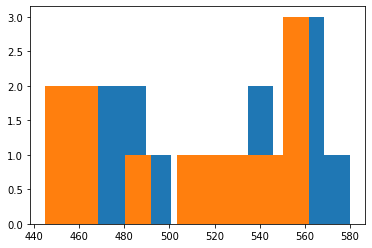

In [ ]:
#Definimos los arreglos
x = np.array([564, 521, 495, 564, 560, 481, 545, 478, 580, 484, 539, 467])
y = np.array([557, 505, 465, 562, 544, 448, 531, 458, 560, 485, 520, 445])

plt.hist(x)
plt.hist(y)

In [ ]:
#usamos las funciones creadas en el archivo TestEquality.ipynb
mw = MannWhitneyTest(x, y)
mw.run_test(alternative = 'F_X < F_Y')

H_0: F_X = F_Y v.s H_a: F_X < F_Y
Rechazar H_0: F_X = F_Y si: Z <= -1.645
Valor que tomó la estadística U': U'_obs = 43
Valor que tomó la estadística Z': Z'_obs = -0.329
->No rechazamos H_0 con nivel de significancia 5.0%


### Ejercicio 3

Una psicóloga quiere saber si las mujeres se molestan más que los hombres cuando hay restrasos en su admisión al hospital para someterse a una cirugía de rutina. Se desarrolla un índice de ansiedad y se mide a los pacientes una
semana antes de la admision programada; este se mide a $17$ hombres y a $23$ mujeres. 
El índice oscila entre $1$ y $40$ en una escala de incremento de ansiedad. La suma de rangos de los $17$ hombres es $428$. ¿Hay evidenica en los datos de que la ansiedad dependa del sexo? Si la hay, ¿que género biológico presenta más ansiedad?  ́

### Ejercicio 4

Un modelo genético sugiere que las probabilidades de un evento trinomial son
$$
\begin{align*}
    \theta_1 &= p^{2} \\
    \theta_2 &= 2p(1-p) \\
    \theta_3 &= (1-p)^{2}
\end{align*}
$$
con $0<p<1$.

Asume que $X_1, X_2$ y $X_3$ representan las frecuencias observadas a cada categoría en una muestra de $n$ ensayos independientes, respectivamente. Obtén una prueba de bondad de ajuste de tipo $\chi ^{2}$ para esta distribución trinomial si $p$ es desconocida.


### Ejercicio 5

La tabla muestra el número de espectáculos de debutaron en Broadway durante 1998. Pruebe la hipótesis de que el número de espectáculos que abren por mes sigue una distribución Poisson. ¿Cómo podrías explicar el patrón de comportamiento observado tomando en cuenta los patrones de turismo?

|   Mes   | Número de show |    Mes     | Número de show |
|:-------:|:--------------:|:----------:|:--------------:|
|  Enero  |        6       | Julio      |        2       |
| Febrero |        3       | Agosto     |        2       |
|  Marzo  |       15       | Septiembre |        2       |
|  Abril  |       28       | Octubre    |        8       |
|  Mayo   |        1       | Noviembre  |       15       |
|  Junio  |        2       | Diciembre  |       17       |


### Ejercicio 6

La oficina de correos quiere determinar si hay una relación entre el peso en kilogramos de la correspondencia de un día y el número de empleados que se requiere para procesarla. ¿Que concluirías dada la siguiente tabla?


| Peso | Empleados |
|:----:|:---------:|
|  13  |     14    |
|  10  |      8    |
|   7  |      5    |
|  12  |      9    |
|  14  |     10    |
|  9.5 |      6    |
| 15.5 |     13    |
| 16.5 |      6    |


### Ejercicio 7

En una muestra nacional de una encuesta realizada por la Secretaría de Educacion Pública y Desarrollo Social, se obtuvo la informacion sobre algunas características de los hogares en Mexico. ¿Existe alguna relación entre las variables escolaridad alcanzada por el jefe de hogar y el tipo de piso en la casa? En caso de existir, ¿qué tan fuerte es la asociacion?

<table>
  <tr>
    <td>&nbsp;</td>
    <td>Primaria incompleta</td>
    <td>Primaria completa</td>
    <td>Secundaria completa</td>
    <td>Más de secundaria</td>
  </tr>
  <tr>
    <td>Piso de tierra</td>
    <td>278</td>
    <td>625</td>
    <td>376</td>
    <td>258</td>
  </tr>
  <tr>
    <td>Piso de cemento</td>
    <td>488</td>
    <td>1443</td>
    <td>1405</td>
    <td>2802</td>
  </tr>
  <tr>
    <td>Piso de mosaico</td>
    <td>47</td>
    <td>235</td>
    <td>405</td>
    <td>1448</td>
  </tr>
</table>


### Ejercicio 8

Simula $10$ observaciones de una distribución normal con media $2$ y varianza $4$. 
Considere las hipótesis:

$$
\begin{align*}
    H_0 : F_X(x) &\text{ es una distribución normal}\\
        &\text{v.s} \\
    H_a : F_X(x) &\text{ no es una distribución normal}
\end{align*}
$$

Considera las pruebas de Kolmogorov-Smirnov, Anderson-Darling, Shapiro-Wilks y Cramer Von Mises para probar la hipótesis. ¿Todas las pruebas coinciden en la decisión? ¿Qué concluirías con $\alpha=0.10$?


### Ejercicio 9

Simula $n=10$ observaciones de una distribución t-Student con $3$ grados de libertad. 
Considere las hipótesis:

$$
\begin{align*}
    H_0 : F_X(x) &\text{ es una distribución normal}\\
        &\text{v.s} \\
    H_a : F_X(x) &\text{ no es una distribución normal}
\end{align*}
$$

Considera las pruebas de Kolmogorov-Smirnov, Anderson-Darling, Shapiro-Wilks y Cramer Von Mises para probar la hipótesis. ¿Todas las pruebas coinciden en la decisión? ¿Qué concluirías con $\alpha=0.10$? Si aumentas $n$, ¿qué puedes decir sobre las pruebas? Nota: Prueba varios valores para $n$.


### Ejercicio 10

Repite los ejercicios 8 y 9 para muestras de tamaño $100$.